In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [12]:
x_train.shape,y_test.shape

((60000, 28, 28), (10000,))

In [15]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

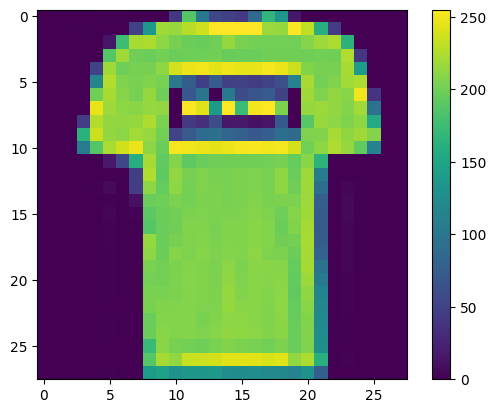

In [22]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
X_train_scaled = x_train / 255
X_test_scaled = x_test / 255

In [57]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [59]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6924 - accuracy: 0.7760
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4764 - accuracy: 0.8344
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4319 - accuracy: 0.8500
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4051 - accuracy: 0.8582
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3860 - accuracy: 0.8645
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3681 - accuracy: 0.8701
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3554 - accuracy: 0.8755
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3427 - accuracy: 0.8797
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3328 - accuracy: 0.8820
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [60]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 4ms/step - loss: 0.3672 - accuracy: 0.8679


[0.36724191904067993, 0.867900013923645]

In [61]:
model.predict(X_test_scaled)

313/313 [==============================] - 1s 4ms/step


array([[4.53033336e-02, 1.89071558e-02, 3.28564830e-02, ...,
        9.93460774e-01, 9.22498703e-01, 9.99667287e-01],
       [9.90094304e-01, 7.57924989e-02, 9.99996364e-01, ...,
        5.18187415e-04, 6.10076010e-01, 5.64319314e-04],
       [9.85041976e-01, 9.99998987e-01, 7.98253417e-01, ...,
        2.86255218e-02, 1.49849072e-01, 3.20859428e-04],
       ...,
       [9.51031983e-01, 1.28914481e-02, 7.46492684e-01, ...,
        1.09563276e-01, 9.99652207e-01, 5.98544860e-03],
       [4.20432538e-01, 9.99981105e-01, 1.95917115e-01, ...,
        9.89903957e-02, 7.24483356e-02, 6.61724731e-02],
       [1.14424787e-01, 6.27994239e-02, 2.12434441e-01, ...,
        9.63234663e-01, 8.07809055e-01, 5.19440591e-01]], dtype=float32)

In [62]:
y_test_pred = model.predict(X_test_scaled)

313/313 [==============================] - 1s 4ms/step


In [35]:
classes[y_test[0]]

'Ankle boot'

In [63]:
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

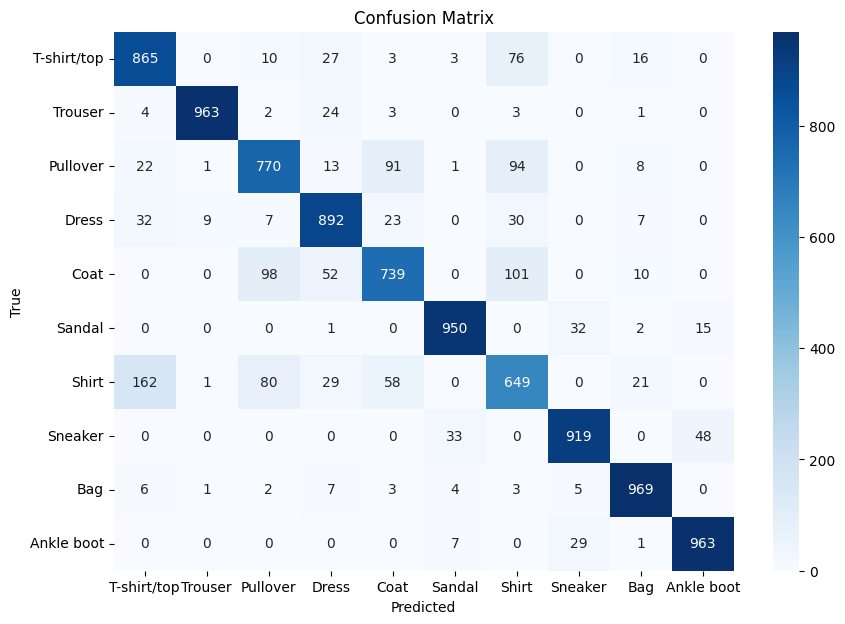

In [64]:
import seaborn as sns

cm = tf.math.confusion_matrix(y_test, y_test_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [49]:
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

In [50]:
y_test_pred_labels.shape

(10000,)